# INCOME PREDICTIONS

### IMPORT REQUIRE PACKAGES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### LOAD THE DATA SET

In [2]:
df = pd.read_csv('./Census_Income.csv')

In [3]:
df.head()

,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             48842 non-null  int64 
 1   Workclass       48842 non-null  object
 2   Final Weight    48842 non-null  int64 
 3   Education       48842 non-null  object
 4   EducationNum    48842 non-null  int64 
 5   Marital Status  48842 non-null  object
 6   Occupation      48842 non-null  object
 7   Relationship    48842 non-null  object
 8   Race            48842 non-null  object
 9   Gender          48842 non-null  object
 10  Capital Gain    48842 non-null  int64 
 11  capital loss    48842 non-null  int64 
 12  Hours per Week  48842 non-null  int64 
 13  Native Country  48842 non-null  object
 14  Income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.columns

Index(['Age', 'Workclass', 'Final Weight', 'Education', 'EducationNum',
       'Marital Status', 'Occupation', 'Relationship', 'Race', 'Gender',
       'Capital Gain', 'capital loss', 'Hours per Week', 'Native Country',
       'Income'],
      dtype='object')

In [6]:
df.shape

(48842, 15)

In [7]:
df.isna().sum()

Age               0
Workclass         0
Final Weight      0
Education         0
EducationNum      0
Marital Status    0
Occupation        0
Relationship      0
Race              0
Gender            0
Capital Gain      0
capital loss      0
Hours per Week    0
Native Country    0
Income            0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
Final Weight,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
EducationNum,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
Capital Gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
Hours per Week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [9]:
df.nunique()

Age                  74
Workclass             9
Final Weight      28523
Education            16
EducationNum         16
Marital Status        7
Occupation           15
Relationship          6
Race                  5
Gender                2
Capital Gain        123
capital loss         99
Hours per Week       96
Native Country       42
Income                4
dtype: int64

<Axes: xlabel='Income', ylabel='count'>

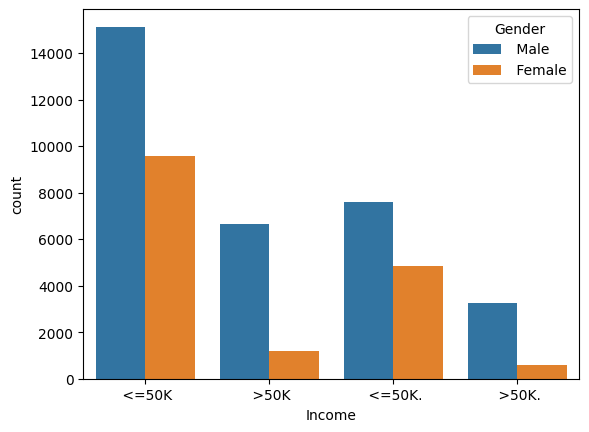

In [10]:
sns.countplot(x ='Income', hue = "Gender", data = df)

<Axes: xlabel='Income', ylabel='count'>

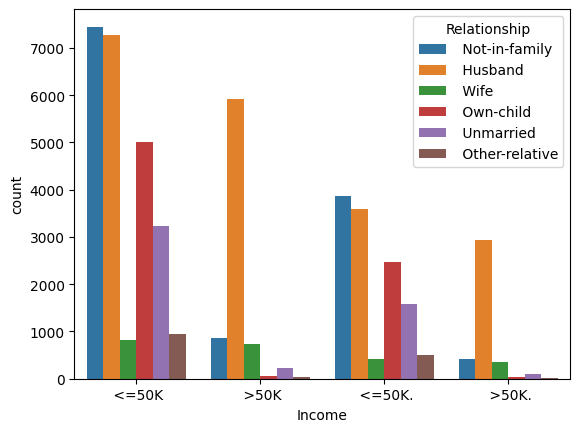

In [11]:
sns.countplot(x ='Income', hue = "Relationship", data = df)

In [12]:
# REPLACE ? IN WORKCLASS
df['Workclass'] = df['Workclass'].str.replace('?', df['Workclass'].mode()[0])
df['Workclass'].value_counts()

Workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
 Private             2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [13]:
# REPLACE ? IN OCCUPATION
df['Occupation'] = df['Occupation'].str.replace('?', df['Occupation'].mode()[0])
df['Occupation'].value_counts()

Occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
 Prof-specialty      2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [14]:
# REPLACE ? IN NATIVE COUNTRY
df['Native Country'] = df['Native Country'].str.replace('?',df['Native Country'].mode()[0])
df['Native Country'].value_counts()

Native Country
United-States                 43832
Mexico                          951
 United-States                  857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [15]:
df['Income'].value_counts()

Income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

In [16]:
df['Income'] = df['Income'].str.replace('.', '', regex=False)
df['Income'].value_counts()

Income
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [17]:
print(df.isna().sum())
df.info()

Age               0
Workclass         0
Final Weight      0
Education         0
EducationNum      0
Marital Status    0
Occupation        0
Relationship      0
Race              0
Gender            0
Capital Gain      0
capital loss      0
Hours per Week    0
Native Country    0
Income            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             48842 non-null  int64 
 1   Workclass       48842 non-null  object
 2   Final Weight    48842 non-null  int64 
 3   Education       48842 non-null  object
 4   EducationNum    48842 non-null  int64 
 5   Marital Status  48842 non-null  object
 6   Occupation      48842 non-null  object
 7   Relationship    48842 non-null  object
 8   Race            48842 non-null  object
 9   Gender          48842 non-null  object
 10  Capital Gain    48842 non-null  int64 
 11  c

In [18]:
## perform label encoding

from sklearn.preprocessing import LabelEncoder
    
df['Workclass'] = LabelEncoder().fit_transform(df['Workclass'])
df['Education'] = LabelEncoder().fit_transform(df['Education'])
df['Marital Status'] = LabelEncoder().fit_transform(df['Marital Status'])
df['Occupation'] = LabelEncoder().fit_transform(df['Occupation'])
df['Relationship'] = LabelEncoder().fit_transform(df['Relationship'])
df['Race'] = LabelEncoder().fit_transform(df['Race'])
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df['Native Country'] = LabelEncoder().fit_transform(df['Native Country'])
df['Income'] = LabelEncoder().fit_transform(df['Income'])

In [19]:
df.head()

,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,Income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


### SPLIT THE DATASET INTO X AND Y

In [20]:
x = df.drop(['Workclass','Final Weight','Race','Native Country','Income'],axis=1)
y = df['Income']

### SPLIT THE DATASET INTO TRAIN AND TEST

In [21]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 123456)

### MODEL TRAINING

In [22]:
def train_model_lg():
    from sklearn.linear_model import LogisticRegressionCV
    model = LogisticRegressionCV(max_iter = 1000)
    model.fit(x_train,y_train)
    return model

In [23]:
def train_model_knn():
    from sklearn.neighbors import KNeighborsClassifier

    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(x_train, y_train)
    return model

In [24]:
def train_model_svm():
    from sklearn.svm import SVC

    model = SVC(C=2.0, gamma='auto')
    model.fit(x_train, y_train)
    return model

In [25]:
def train_model_nb():
    from sklearn.naive_bayes import GaussianNB

    model = GaussianNB()
    model.fit(x_train, y_train)
    return model

In [26]:
def train_model_dt():
    from sklearn.tree import DecisionTreeClassifier

    model = DecisionTreeClassifier(max_depth=5)
    model.fit(x_train, y_train)
    return model

In [27]:
def train_model_rf():
    from sklearn.ensemble import RandomForestClassifier

    model = RandomForestClassifier(n_estimators=100)
    model.fit(x_train, y_train)
    return model

In [28]:
def train_model_catboost():
    # pip install catboost
    from catboost import CatBoostClassifier

    model = CatBoostClassifier()
    result = model.fit(x_train, y_train)
    return model

In [29]:
def train_model_adaboot():
    from sklearn.ensemble import AdaBoostClassifier

    model = AdaBoostClassifier()
    result = model.fit(x_train, y_train)
    return model

In [30]:
def train_model_xgb():
    from xgboost import XGBClassifier

    model = XGBClassifier()
    result = model.fit(x_train, y_train)
    return model

In [31]:
models = [
    (train_model_lg(),'Logistic Regression',(0,0)),
    (train_model_knn(), 'KNN',(0,1)),
    (train_model_svm(), 'SVM',(1,0)),
    (train_model_nb(), 'Naive Bayes',(1,1)),
    (train_model_dt(), 'Decision Tree',(2,0)),
    (train_model_rf(), 'Random Forest',(2,1)),
    (train_model_catboost(), 'CatBoost',(3,0)),
    (train_model_adaboot(), 'AdaBoost',(3,1)),
    (train_model_xgb(), 'XG Boost',(4,0))
]

/home/sunbeam/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sunbeam/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

Learning rate set to 0.04794
0:	learn: 0.6402610	total: 69ms	remaining: 1m 8s
1:	learn: 0.6038879	total: 73.5ms	remaining: 36.7s
2:	learn: 0.5664045	total: 77ms	remaining: 25.6s
3:	learn: 0.5366226	total: 80ms	remaining: 19.9s
4:	learn: 0.5121125	total: 83ms	remaining: 16.5s
5:	learn: 0.4925048	total: 86ms	remaining: 14.3s
6:	learn: 0.4713725	total: 89.2ms	remaining: 12.6s
7:	learn: 0.4528443	total: 92.5ms	remaining: 11.5s
8:	learn: 0.4370860	total: 95.7ms	remaining: 10.5s
9:	learn: 0.4241899	total: 98.9ms	remaining: 9.79s
10:	learn: 0.4143726	total: 102ms	remaining: 9.17s
11:	learn: 0.4038680	total: 105ms	remaining: 8.68s
12:	learn: 0.3955348	total: 109ms	remaining: 8.27s
13:	learn: 0.3871626	total: 112ms	remaining: 7.89s
14:	learn: 0.3806081	total: 115ms	remaining: 7.56s
15:	learn: 0.3743084	total: 118ms	remaining: 7.28s
16:	learn: 0.3696040	total: 122ms	remaining: 7.03s
17:	learn: 0.3652073	total: 125ms	remaining: 6.8s
18:	learn: 0.3611281	total: 128ms	remaining: 6.6s
19:	learn: 0.3

/home/sunbeam/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


### EVALUATE THE MODEL

In [43]:
def evaluate_model(model, model_name):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    

    y_pred = model.predict(x_test)
    y_true = y_test

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return model_name, accuracy , precision, recall, f1

In [44]:
data = []
for (model, model_name,_) in models:
    data.append(evaluate_model(model, model_name))

result = pd.DataFrame(data, columns=['Algorithm', 'Accuracy', 'Precision', 'Recall', 'f1'])
result

,Algorithm,Accuracy,Precision,Recall,f1
0,Logistic Regression,0.824748,0.726431,0.448670,0.554723
1,KNN,0.847924,0.706144,0.642208,0.672660
2,SVM,0.822373,0.705220,0.463817,0.559594
3,Naive Bayes,0.799279,0.688953,0.319084,0.436163
4,Decision Tree,0.853820,0.785096,0.549647,0.646605
5,Random Forest,0.844812,0.705030,0.622686,0.661305
6,CatBoost,0.872574,0.778653,0.665433,0.717604
7,AdaBoost,0.860536,0.778314,0.596769,0.675557
8,XG Boost,0.872164,0.778877,0.662740,0.716130


In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(f"accuracy : {accuracy_score(y_true, y_pred) * 100:.2f}%")

print(f"precision: {precision_score(y_true, y_pred):.2f}")
print(f"recall: {recall_score(y_true, y_pred):.2f}")  
print(f"F1 Score: {f1_score(y_true, y_pred):.2f}")

accuracy : 87.22%
precision: 0.78
recall: 0.66
F1 Score: 0.72
